## LSTM Demo NLP

In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
os.getcwd()

Using TensorFlow backend.


'/Users/Edureka'

In [2]:
tweets=pd.read_csv('./Python/demonetization-tweets_data.csv',encoding='ISO-8859-1')

In [3]:
tweets.sample(5)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,statusSource,screenName,retweetCount,isRetweet,retweeted
3853,RT @BajajAllianzLIC: With the initiative of #D...,False,0,NaN,11/22/2016 11:52,False,NaN,"<a href=""http://twitter.com/download/android"" ...",rdx_75,33,True,False
5164,"RT @DrPippaM: Demonetization: ""Out Of Cash"" - ...",False,0,NaN,4/17/2017 10:42,False,NaN,"<a href=""http://twitter.com/download/android"" ...",ektrit,14,True,False
5043,Demonetization of Rs. 500 and Rs. 1000 currenc...,False,0,NaN,4/17/2017 19:06,False,NaN,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",broadbandforum,0,False,False
2271,To all Social media buds- considering the hue ...,False,0,NaN,11/23/2016 5:06,False,NaN,"<a href=""http://twitter.com/download/android"" ...",nishantsingh76,0,False,False
3443,RT @aartic02: But Modi &amp; Chamchas told Ter...,False,0,NaN,11/22/2016 14:00,False,NaN,"<a href=""http://twitter.com/download/android"" ...",SreeHarsha2015,44,True,False


In [4]:
tweets.text[2]

'RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F'

In [5]:
import re,string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [6]:
# I am going to the garden today with my cousins and my relatives who are in hyderabad

In [7]:
def clean_text(tweets):
    tweets=word_tokenize(tweets)
    tweets=tweets[4:]
    tweets=" ".join(tweets)
    tweets=re.sub('https','',tweets)
    tweets=[c for c in tweets if c not in string.punctuation]
    tweets="".join(tweets)
    tweets=[word for word in tweets.split() if word.lower() not in stopwords.words('english')]
    return " ".join(tweets)

In [8]:
tweets['cleaned_text']=tweets['text'].apply(clean_text)

In [9]:
tweets['text'].head()

0    RT @rssurjewala: Critical question: Was PayTM ...
1    RT @roshankar: Former FinSec, RBI Dy Governor,...
2    RT @satishacharya: Reddy Wedding! @mail_today ...
3    RT @gauravcsawant: Rs 40 lakh looted from a ba...
4    RT @sumitbhati2002: Many opposition leaders ar...
Name: text, dtype: object

In [10]:
tweets['cleaned_text'].head()

0    Critical question PayTM informed Demonetizatio...
1    Former FinSec RBI Dy Governor CBDT Chair Harva...
2    Reddy Wedding mailtoday cartoon demonetization...
3    Rs 40 lakh looted bank Kishtwar J amp K Third ...
4    Many opposition leaders narendramodi Demonetiz...
Name: cleaned_text, dtype: object

In [11]:
tweets['cleaned_text'][6]

'28 ed U00A0 U00BD ed U00B8 U0082 protesting demonetization different party leaders'

In [12]:
import re
features=tweets['cleaned_text']
processed_features=[]
for sentence in range(0,len(features)):
    # Remove special characters
    processed_feature=re.sub(r'\W', ' ',str(features[sentence]))
    
    #Remove for single characters
    processed_feature=re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    
    #Remove single character at the starting of the sentence
    processed_feature=re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    
    #Remove Mulitple spaces and replace with single space
    processed_feature=re.sub(r'\s+', ' ', processed_feature,flags=re.I)
    
    #Remove byte character b
    processed_feature=re.sub(r'^b\s+', '', processed_feature)
    
    #Convert everything to lowercase
    processed_feature=processed_feature.lower()
    
    processed_features.append(processed_feature)
                             

In [13]:
processed_features[:6]

['critical question paytm informed demonetization edict pm clearly fishy requires full disclosure amp',
 'former finsec rbi dy governor cbdt chair harvard professor lambaste demonetization aam aadmi listen th',
 'reddy wedding mailtoday cartoon demonetization reddywedding tcou7glnrq31f',
 'rs 40 lakh looted bank kishtwar amp third incident since demonetization terrorists',
 'many opposition leaders narendramodi demonetization respect decision support oppositio',
 'narendramodi demonetization respect decision support opposition bcoz party']

In [14]:
tweets['processed_text']=processed_features

In [15]:
tweets.sample(4)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,statusSource,screenName,retweetCount,isRetweet,retweeted,cleaned_text,processed_text
2333,#demonetization - https://t.co/ljha0rZiK8 Demo...,False,0,NaN,11/23/2016 4:35,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",bucamupog,0,False,False,tcoljha0rZiK8 Demonetization result brighter f...,tcoljha0rzik8 demonetization result brighter f...
3369,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,11/22/2016 14:28,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",mainavishal0018,331,True,False,Critical question PayTM informed Demonetizatio...,critical question paytm informed demonetizatio...
4036,RT @jamewils: @Memeghnad PAN duplicate argumen...,False,0,NaN,4/21/2017 14:06,False,NaN,"<a href=""http://twitter.com/download/android"" ...",aamaadmikesath,44,True,False,Memeghnad PAN duplicate argument reminds exact...,memeghnad pan duplicate argument reminds exact...
2493,RT @YesIamSaffron: Must Watch\r\n.\r\nDelhitie...,False,0,NaN,11/23/2016 2:42,False,NaN,"<a href=""http://twitter.com/download/android"" ...",lallamitabh,960,True,False,Must Watch Delhities Standing Long Bank Que Pr...,must watch delhities standing long bank que pr...


In [16]:
from textblob import TextBlob

In [17]:
def generate_polarity(text):
    sentiment=TextBlob(text).sentiment
    return sentiment

In [18]:
sentiment=tweets['processed_text'].apply(generate_polarity)
sentiment=sentiment.to_frame()

In [19]:
sentiment.head()
sentiment.processed_text[0]

Sentiment(polarity=0.15, subjectivity=0.5777777777777778)

In [20]:
sentiment['polarity']=sentiment['processed_text'].apply(lambda x: x[0])

In [21]:
sentiment['subjectivity']=sentiment['processed_text'].apply(lambda x:x[1])

In [22]:
sentiment.head()

,processed_text,polarity,subjectivity
0,"(0.15, 0.5777777777777778)",0.15,0.577778
1,"(0.0, 0.0)",0.00,0.000000
2,"(0.0, 0.0)",0.00,0.000000
3,"(0.0, 0.0)",0.00,0.000000
4,"(0.5, 0.5)",0.50,0.500000


In [23]:
tweets['polarity']=sentiment['polarity']
tweets['subjectivity']=sentiment['subjectivity']

In [24]:
tweets.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,statusSource,screenName,retweetCount,isRetweet,retweeted,cleaned_text,processed_text,polarity,subjectivity
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,11/23/2016 18:40,False,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,Critical question PayTM informed Demonetizatio...,critical question paytm informed demonetizatio...,0.15,0.577778
1,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,11/23/2016 18:40,False,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,Former FinSec RBI Dy Governor CBDT Chair Harva...,former finsec rbi dy governor cbdt chair harva...,0.00,0.000000
2,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,11/23/2016 18:39,False,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,Reddy Wedding mailtoday cartoon demonetization...,reddy wedding mailtoday cartoon demonetization...,0.00,0.000000
3,RT @gauravcsawant: Rs 40 lakh looted from a ba...,False,0,NaN,11/23/2016 18:38,False,NaN,"<a href=""http://twitter.com/download/android"" ...",bhodia1,637,True,False,Rs 40 lakh looted bank Kishtwar J amp K Third ...,rs 40 lakh looted bank kishtwar amp third inci...,0.00,0.000000
4,RT @sumitbhati2002: Many opposition leaders ar...,False,0,NaN,11/23/2016 18:38,False,NaN,"<a href=""http://twitter.com/download/android"" ...",sumitbhati2002,1,True,False,Many opposition leaders narendramodi Demonetiz...,many opposition leaders narendramodi demonetiz...,0.50,0.500000


In [25]:
tweets['polarity_encoded']=['positive' if x>0 else 'negative' if x<0 else 'netural' for x in tweets['polarity']]

In [26]:
tweets['polarity_encoded'].unique()

array(['positive', 'netural', 'negative'], dtype=object)

In [27]:
tweets['polarity_encoded'].value_counts()

netural     3724
positive    2645
negative    1101
Name: polarity_encoded, dtype: int64

In [28]:
df=tweets[['processed_text','polarity_encoded']]

In [29]:
df.sample(6)

,processed_text,polarity_encoded
6261,payments growth india tcomkbus0tomc,netural
3463,demonetization paan shop owner gets fake rs 20...,negative
2271,buds considering hue cry demonetization think ...,netural
6700,people got stunts like swachata diwas yoga day...,netural
4956,grow 72 post demonetization eggs face harvard ...,netural
5669,dear evanspiegel india rich pm narendra modi i...,positive


In [30]:
df.shape

(7470, 2)

In [31]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split

In [32]:
def tokenize(text):
    tk=TweetTokenizer()
    return tk.tokenize(text)

vectorizer=CountVectorizer(analyzer='word',tokenizer=tokenize,lowercase=True,ngram_range=(1,1))

In [33]:
df.head()

,processed_text,polarity_encoded
0,critical question paytm informed demonetizatio...,positive
1,former finsec rbi dy governor cbdt chair harva...,netural
2,reddy wedding mailtoday cartoon demonetization...,netural
3,rs 40 lakh looted bank kishtwar amp third inci...,netural
4,many opposition leaders narendramodi demonetiz...,positive


In [130]:
features=df['processed_text'].values
target=df['polarity_encoded'].values

In [131]:
f=vectorizer.fit_transform(features)
print(type(f))
f=f.toarray()

<class 'scipy.sparse.csr.csr_matrix'>


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
t=le.fit_transform(target)

In [37]:
features=vectorizer.fit_transform(df['processed_text'])
target=vectorizer.fit_transform(df['polarity_encoded'])

In [38]:
features=features.toarray()
target=target.toarray()

In [39]:
type(f),f.shape

(numpy.ndarray, (7470, 8919))

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(f,t,random_state=504,test_size=0.2)

In [41]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((5976, 8919), (1494, 8919), (5976,), (1494,))

In [42]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [43]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape,xtrain.shape[1:]

((5976, 8919, 1), (1494, 8919, 1), (5976,), (1494,), (8919, 1))

In [97]:
model=Sequential()

In [98]:
#model.add(Embedding(1500, 8, input_length=8919))
model.add(LSTM(1,input_shape=(8919, 1)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [99]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=(['accuracy']))

In [100]:
model.fit(xtrain,ytrain,epochs=3,batch_size=64,verbose=1,validation_data=(xtest,ytest))

Train on 5976 samples, validate on 1494 samples
Epoch 1/3
5976/5976 [==============================] - 625s 105ms/step - loss: 0.6440 - accuracy: 0.4923 - val_loss: 0.5878 - val_accuracy: 0.4967
Epoch 2/3
5976/5976 [==============================] - 688s 115ms/step - loss: 0.5302 - accuracy: 0.4990 - val_loss: 0.4729 - val_accuracy: 0.4967
Epoch 3/3
5976/5976 [==============================] - 835s 140ms/step - loss: 0.4181 - accuracy: 0.4990 - val_loss: 0.3652 - val_accuracy: 0.4967


In [49]:
model.evaluate(xtest,ytest)

1494/1494 [==============================] - 26s 17ms/step


[0.043294071323341794, 0.496653288602829]

In [101]:
predict=model.predict(xtest)

In [135]:
type(predict),predict.shape

(numpy.ndarray, (1494,))

In [136]:
predict=predict.reshape(-1,)

In [104]:
predictions=pd.DataFrame({'Actual':ytest,'Predicted':predict})

In [ ]:
predictions

In [149]:
results=pd.DataFrame({'Actual':ytest,'Predicted':predict})


1494

In [151]:
results.sample(5)

,Actual,Predicted
385,0,0.625056
32,2,0.625056
1290,0,0.625056
1058,1,0.625056
1189,0,0.625056


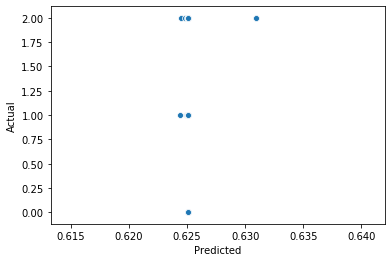

In [156]:
import seaborn as sns
sns.scatterplot('Predicted','Actual',data=results)